# One part of the first part (Exploratory Data Analysis)

Using the same data as for the collaborative filtering in 1.3, for the simple recommender I didnt use the same dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import datetime

In [2]:
ratings2 = pd.read_csv('dataset/ratings.csv')
movies = pd.read_csv('dataset/movies.csv')

#Lets merge them together
movies = pd.merge(movies, ratings2)
movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### Breaking down the data and looking at int in different ways

In [3]:
movies.shape
# Shape of the data

(100836, 6)

In [4]:
list(movies.columns)
# All the columns

['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp']

In [5]:
movies.count()
# Data of the coloumns

movieId      100836
title        100836
genres       100836
userId       100836
rating       100836
timestamp    100836
dtype: int64

In [6]:
movies.describe()
# How does the values inside our data look

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


# We could want to plot all the ratings just to look at which rating is the most popular

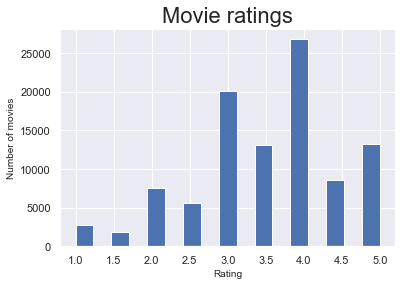

In [7]:
plt.hist(movies['rating'], range=(1,5), bins=17)
plt.title('Movie ratings', fontsize=22)
plt.xlabel('Rating', fontsize= 10)
plt.ylabel('Number of movies', fontsize=10)
plt.show()

# We may also want to see what the average rating out of 5 is in our dataset
Its hard to tell just from the plot

In [8]:
movies_avg= movies['rating'].mean()
print('The overall average of all the films out of 5 is: ', movies_avg)

The overall average of all the films out of 5 is:  3.501556983616962


# Then genres, what is the most popular genre?
Here we have them!

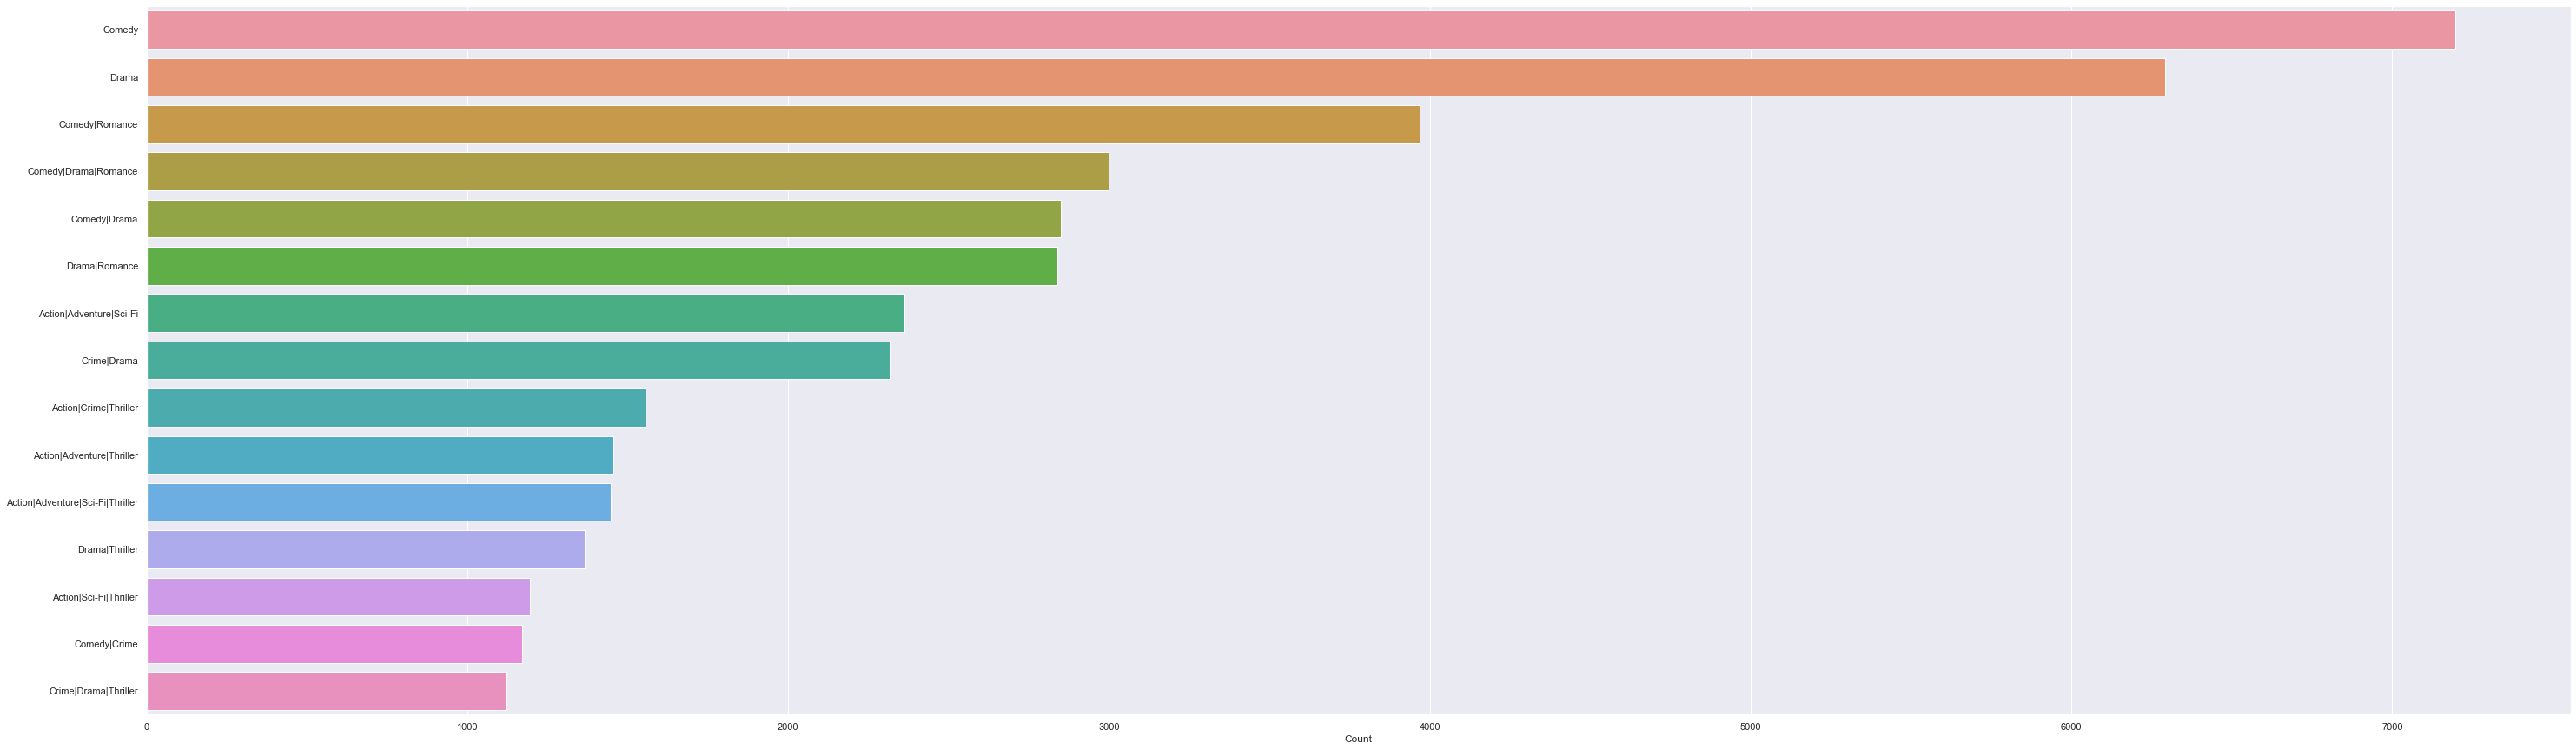

In [9]:
y=movies.groupby("genres")['genres'].count().nlargest(15)
y
x = y.index #the index(row labels) of the dataframe
 
plt.figure(figsize=(50,15)) # setting the plot figure size
ax = sns.barplot(x= y, y = x) #using the seaborn's barplot method
ax.set(xlabel = 'Count') 
ax.set(ylabel = '') 

plt.show() # displaying the plot

# Its a bit hard to tell as the image is so small but if you extend it its quite obvious that comedy and drama are by far the most popular

# We can also compare the genres to a few other genres to see how much of a difference there is

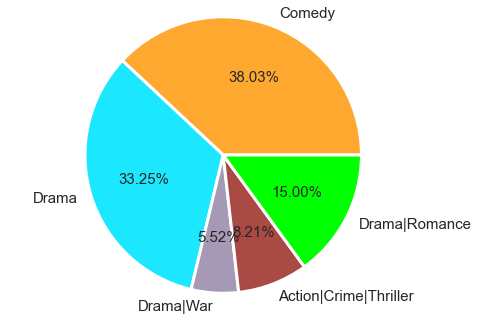

In [48]:
#storing the top 3 genres with highest IMDB scores in a list
list_of_genre= ["Comedy", "Drama", "Drama|War", "Action|Crime|Thriller","Drama|Romance"] 

genre_list_count=[]
for i in range(0,5):
    genre_count=len(movies[movies['genres'] == list_of_genre[i]])

    genre_list_count.append(genre_count) # appending the total count of each genre in the list

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colorss = ['#FEA82F','#1BE7FF','#A599B5', '#AA4A44', '#00FF00']
ax.pie(genre_list_count, labels = list_of_genre,autopct='%1.2f%%', colors=colorss, wedgeprops = {'linewidth': 3}, radius=1.2, textprops = {"fontsize":15})
plt.show()